# Task
Analyze and visualize the structure, distributions of features (using histograms for numerical and count plots for categorical), and missing values of the `df_tr`, `df_te`, and `df_va` DataFrames, compare key statistics across these datasets, and summarize the key insights to prepare for model training.

## Initial Data Overview

### Subtask:
Perform an initial overview of each dataset, including displaying their shapes, column names, data types, and checking for missing values to understand their structure and completeness.


**Reasoning**:
I will display the shape, column names, data types, and missing values for each of the dataframes (`df_tr`, `df_te`, and `df_va`) to provide an initial overview of their structure and completeness as requested by the instructions.



In [6]:
print("--- df_tr Overview ---")
print(f"Shape: {df_tr.shape}")
df_tr.info()
print("Missing Values:")
print(df_tr.isnull().sum())

print("\n--- df_te Overview ---")
print(f"Shape: {df_te.shape}")
df_te.info()
print("Missing Values:")
print(df_te.isnull().sum())

print("\n--- df_va Overview ---")
print(f"Shape: {df_va.shape}")
df_va.info()
print("Missing Values:")
print(df_va.isnull().sum())

--- df_tr Overview ---
Shape: (80000, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   80000 non-null  object 
 1   borrower_age                  80000 non-null  int64  
 2   employment_type               80000 non-null  object 
 3   employment_tenure_years       80000 non-null  float64
 4   residence_years               80000 non-null  float64
 5   marital_status                80000 non-null  object 
 6   dependents_count              80000 non-null  int64  
 7   monthly_gross_income          80000 non-null  float64
 8   net_disposable_income         80000 non-null  float64
 9   income_variability_flag       80000 non-null  int64  
 10  existing_emi_obligation       80000 non-null  float64
 11  debt_to_income_ratio          80000 non-null  float64
 12  avg_savings_balanc

### Initial Overview Summary

- **df_tr (Training Data)**:
    - Shape: (80000 rows, 40 columns)
    - Data Types: 19 float64, 16 int64, 5 object
    - Missing Values: No missing values in any column.
    - Contains the `ews_flag` column, which is likely the target variable.

- **df_te (Test Data)**:
    - Shape: (20000 rows, 40 columns)
    - Data Types: 19 float64, 16 int64, 5 object
    - Missing Values: No missing values in any column.
    - Contains the `ews_flag` column.

- **df_va (Validation Data)**:
    - Shape: (20000 rows, 39 columns)
    - Data Types: 19 float64, 16 int64, 4 object
    - Missing Values: No missing values in any column.
    - **Key Observation**: `df_va` has one less column (39 columns) compared to `df_tr` and `df_te` (40 columns). It notably lacks the `ews_flag` column, which is expected for a validation/inference dataset where the target is to be predicted.

## Univariate Analysis and Visualization

### Subtask:
Analyze the distributions of individual features across all three datasets (`df_tr`, `df_te`, and `df_va`). This will involve generating histograms for numerical features and count plots for categorical features to visualize their characteristics. Ensure legends are provided for all visualizations.


**Reasoning**:
First, I will import the necessary libraries for plotting, `matplotlib.pyplot` and `seaborn`. Then, I will identify the numerical and categorical columns from the `df_tr` DataFrame, excluding the `customer_id` column as it is an identifier and not relevant for distribution analysis. This setup is crucial for correctly iterating through and visualizing the features as requested by the subtask.



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Identify numerical and categorical columns from df_tr
numerical_cols = df_tr.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_tr.select_dtypes(include=['object']).columns.tolist()

# Exclude 'customer_id' from analysis
if 'customer_id' in numerical_cols:
    numerical_cols.remove('customer_id')
if 'customer_id' in categorical_cols:
    categorical_cols.remove('customer_id')

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['borrower_age', 'employment_tenure_years', 'residence_years', 'dependents_count', 'monthly_gross_income', 'net_disposable_income', 'income_variability_flag', 'existing_emi_obligation', 'debt_to_income_ratio', 'avg_savings_balance', 'loan_amount', 'loan_tenure_months', 'interest_rate', 'emi_amount', 'loan_vintage_months', 'current_dpd', 'past_delinquency_count', 'max_dpd_12m', 'on_time_payment_ratio', 'missed_payment_count', 'partial_payment_flag', 'auto_debit_bounce_count', 'days_since_last_payment', 'rolling_dpd_trend', 'payment_volatility_score', 'emi_stress_ratio', 'delinquency_acceleration', 'payment_regularity_score', 'bounce_frequency_ratio', 'recovery_lag_days', 'outstanding_balance_ratio', 'utilization_shock_flag', 'repayment_fatigue_index', 'exposure_concentration_score', 'behavioral_risk_score']
Categorical Columns: ['employment_type', 'marital_status', 'loan_type', 'ews_flag']


**Reasoning**:
I will iterate through each numerical column and create comparative histograms across `df_tr`, `df_te`, and `df_va`. For each feature, I'll generate a single figure with subplots, ensuring clear titles, labels, and legends to compare distributions across datasets. This directly addresses the subtask's requirement for visualizing numerical feature distributions.



Generating histograms for numerical features...


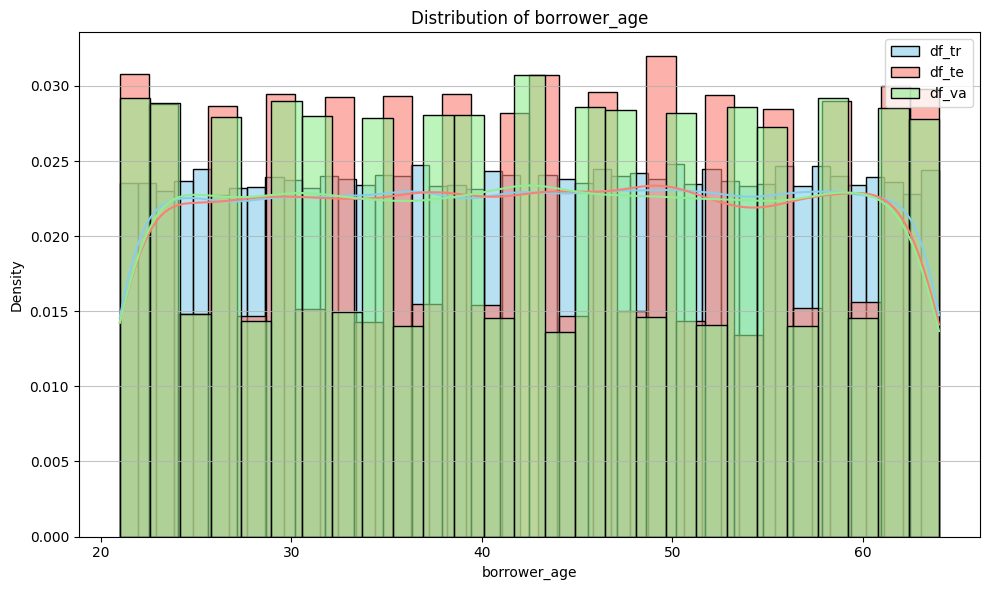

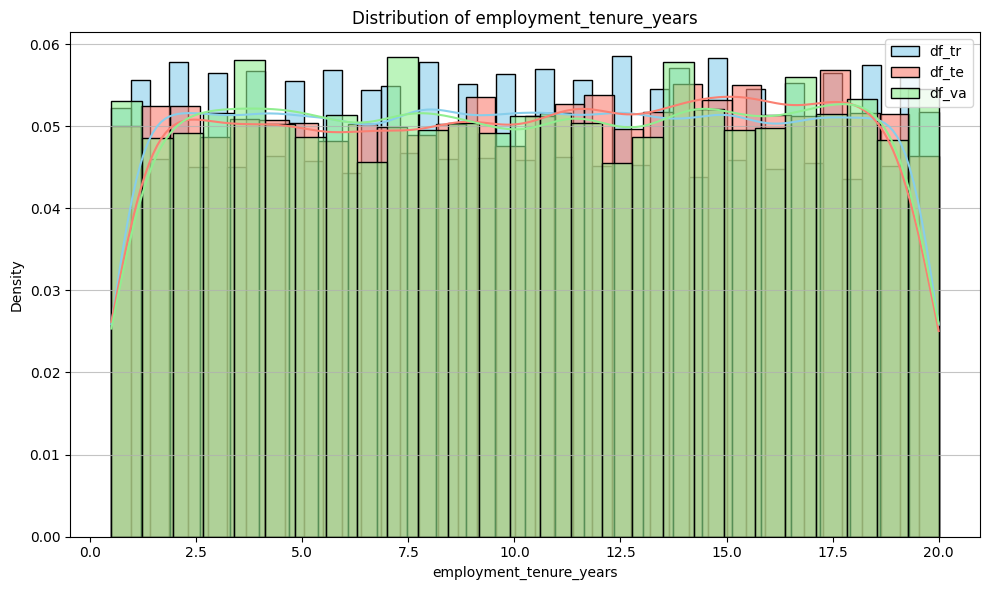

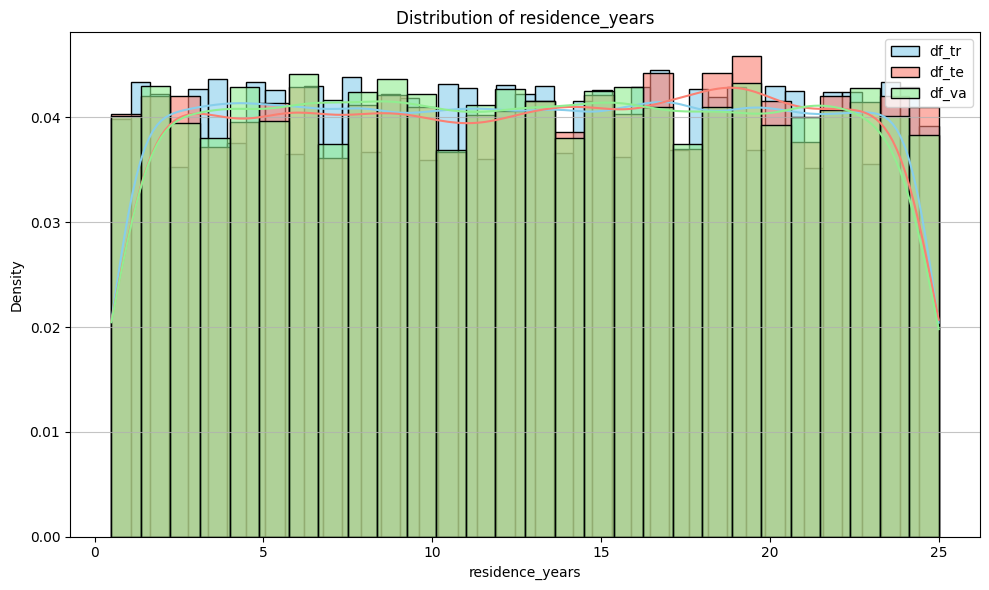

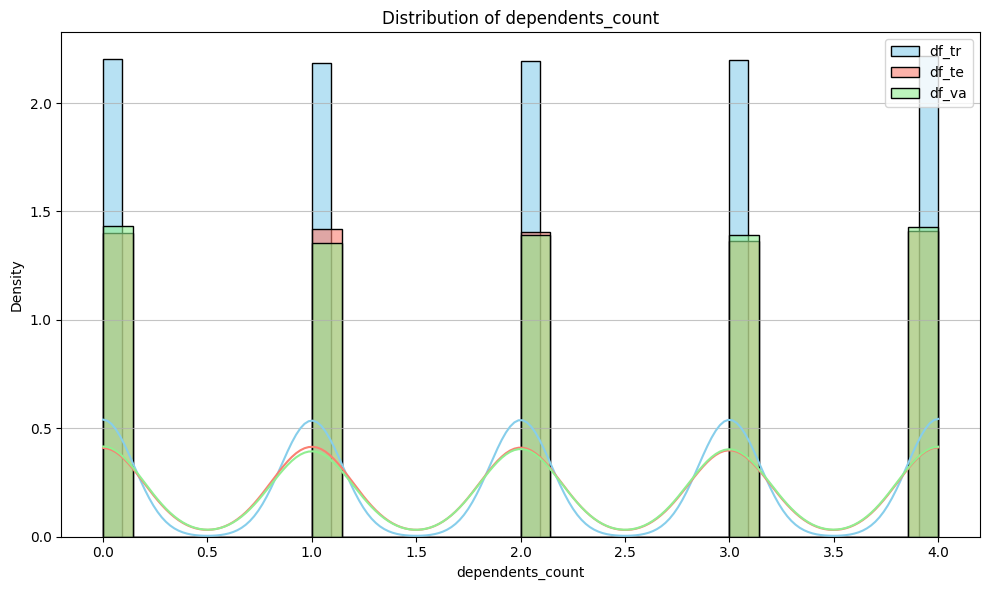

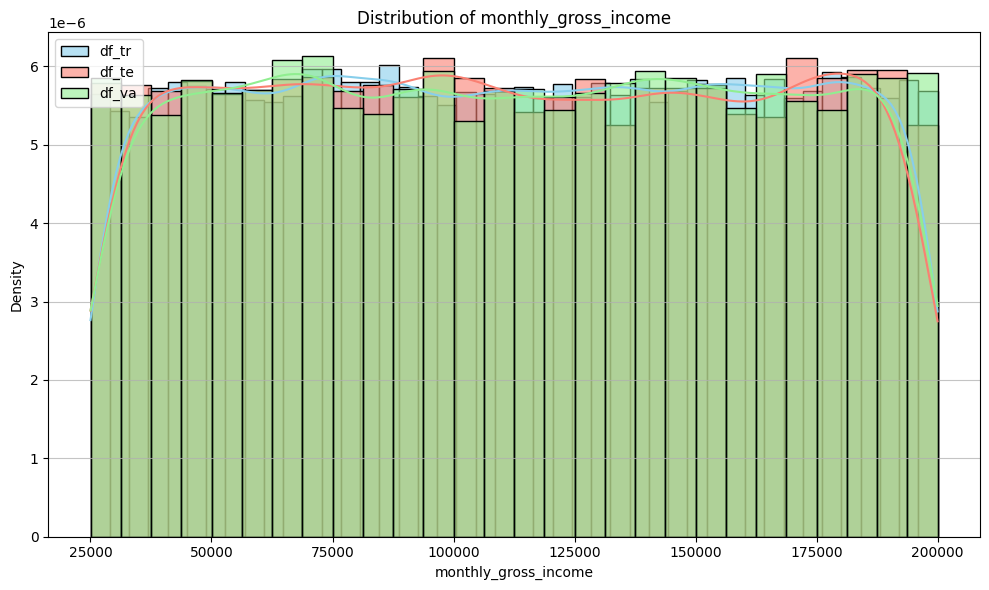

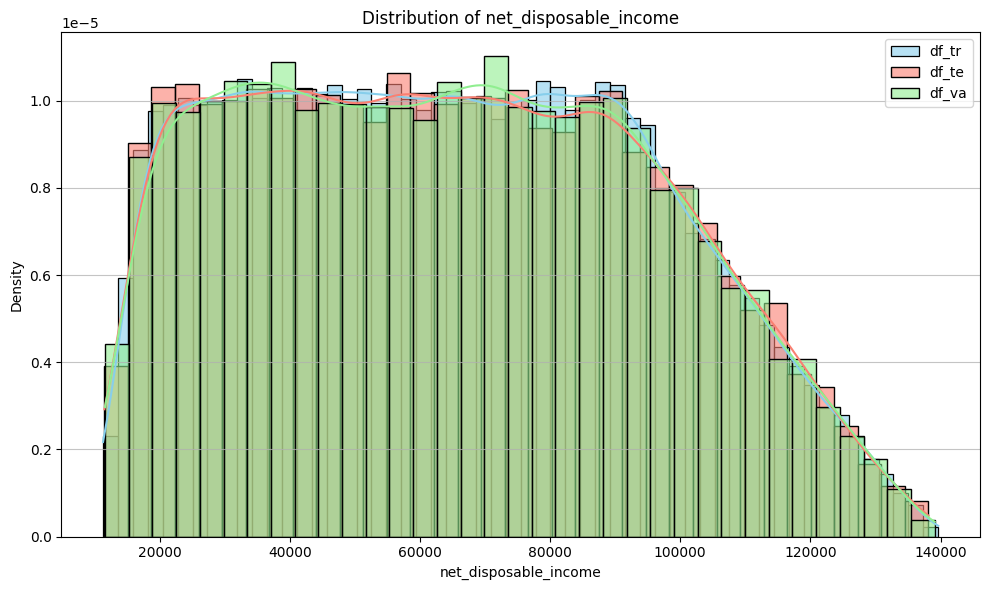

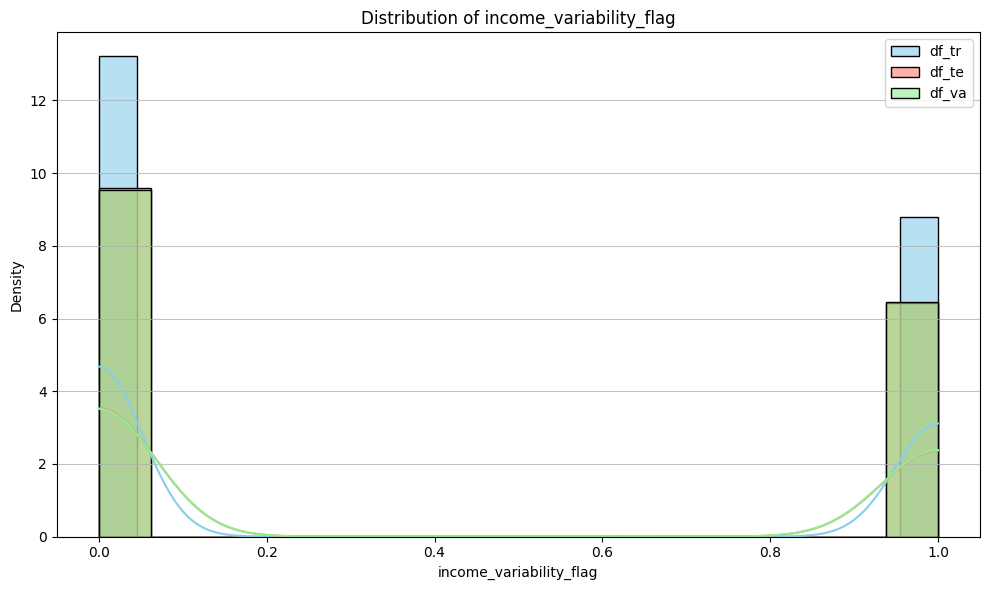

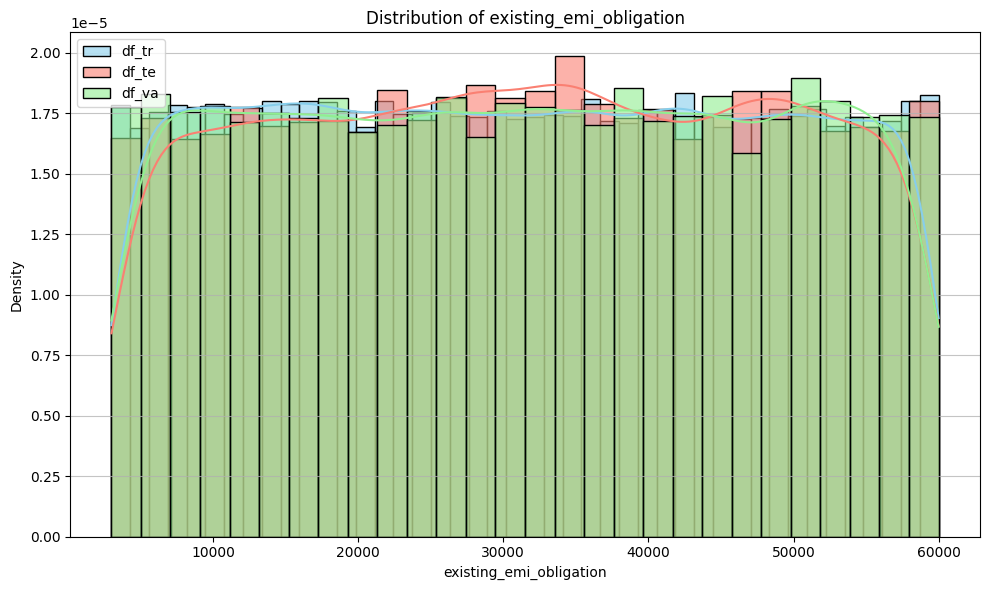

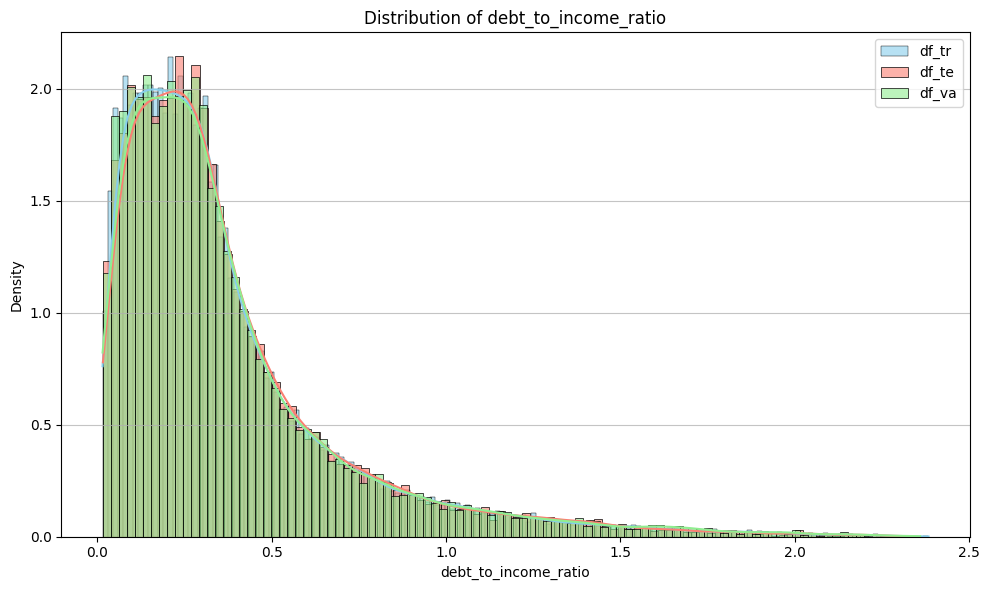

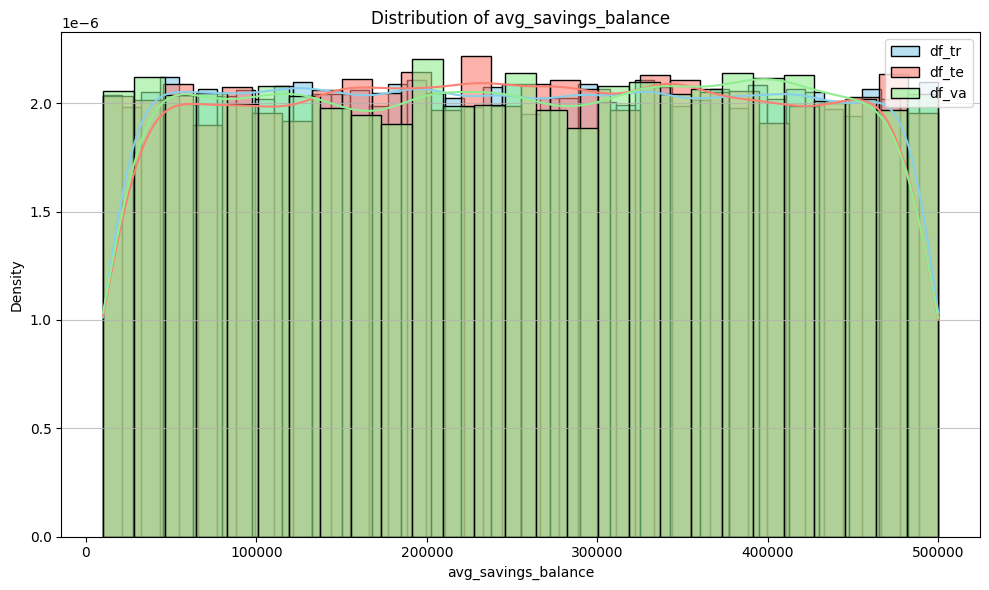

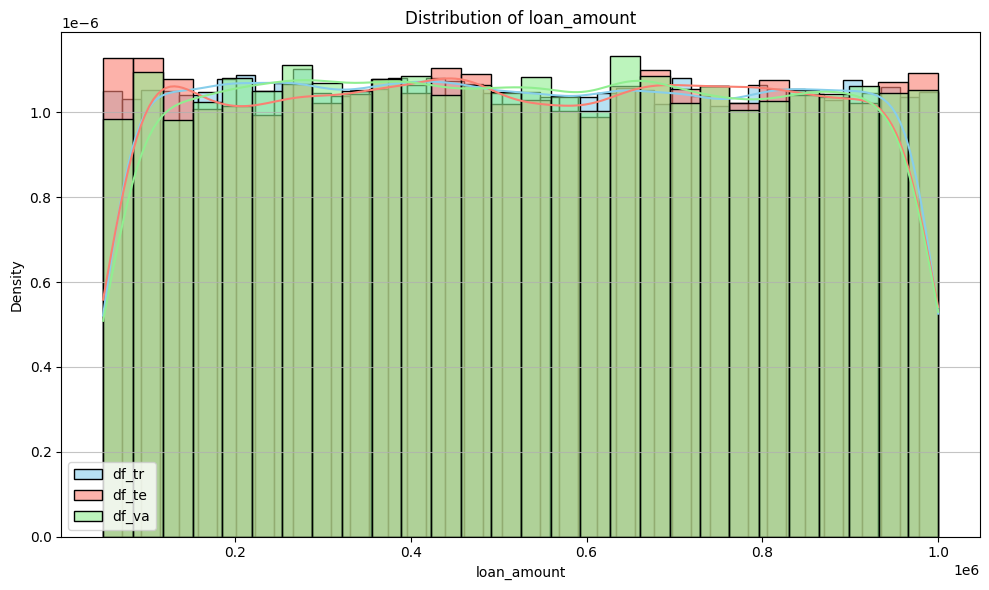

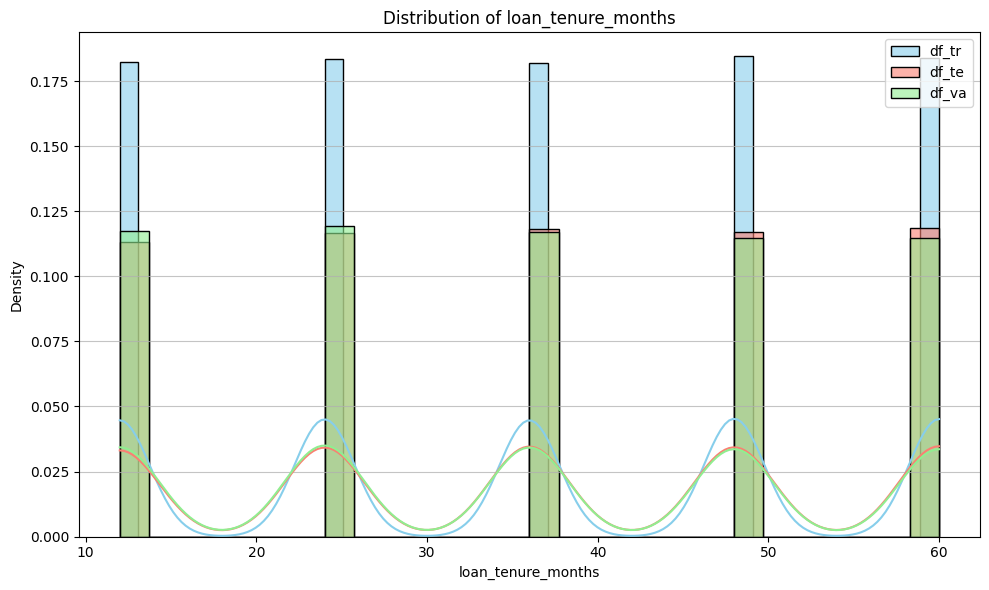

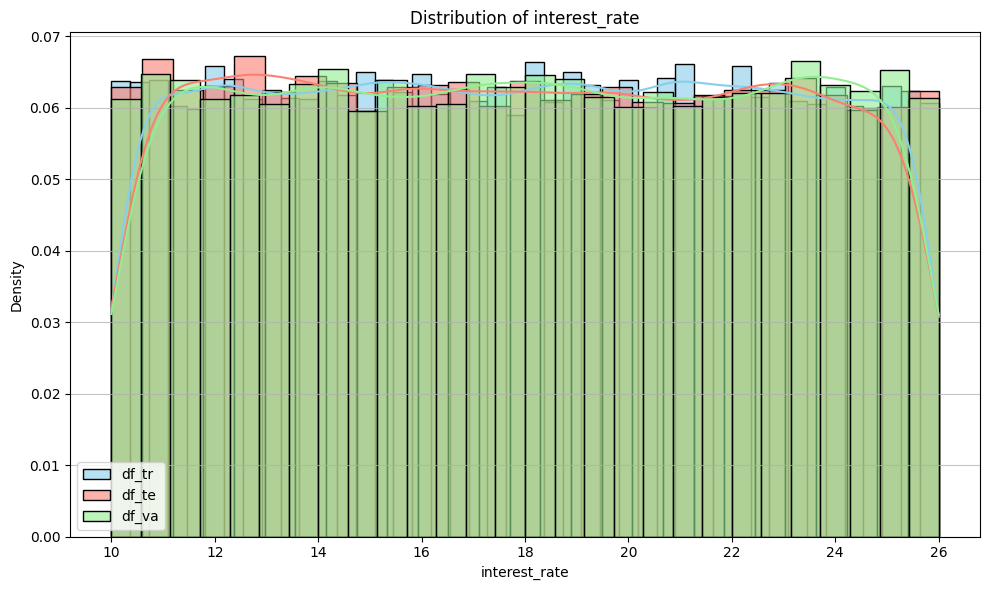

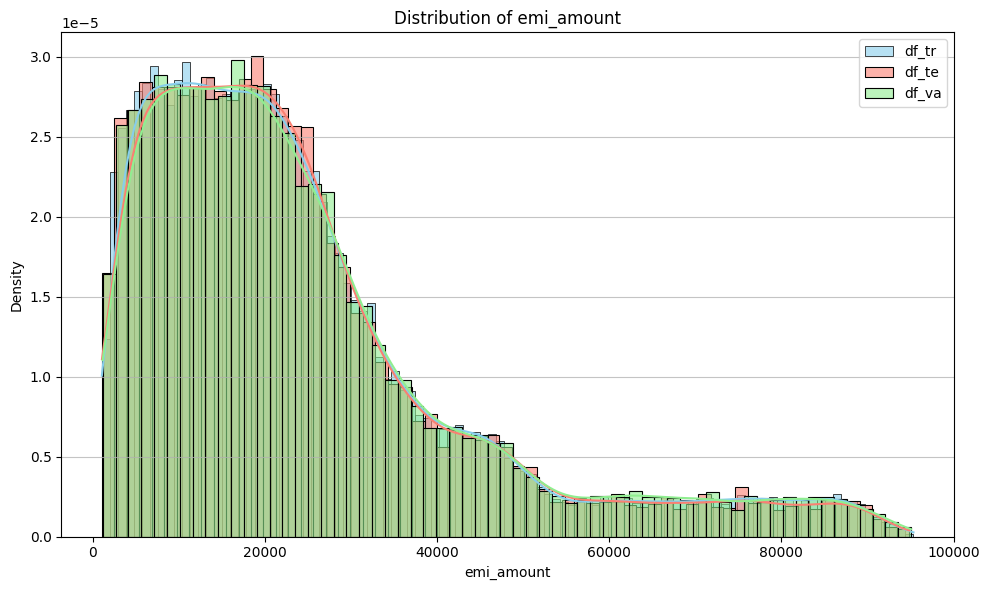

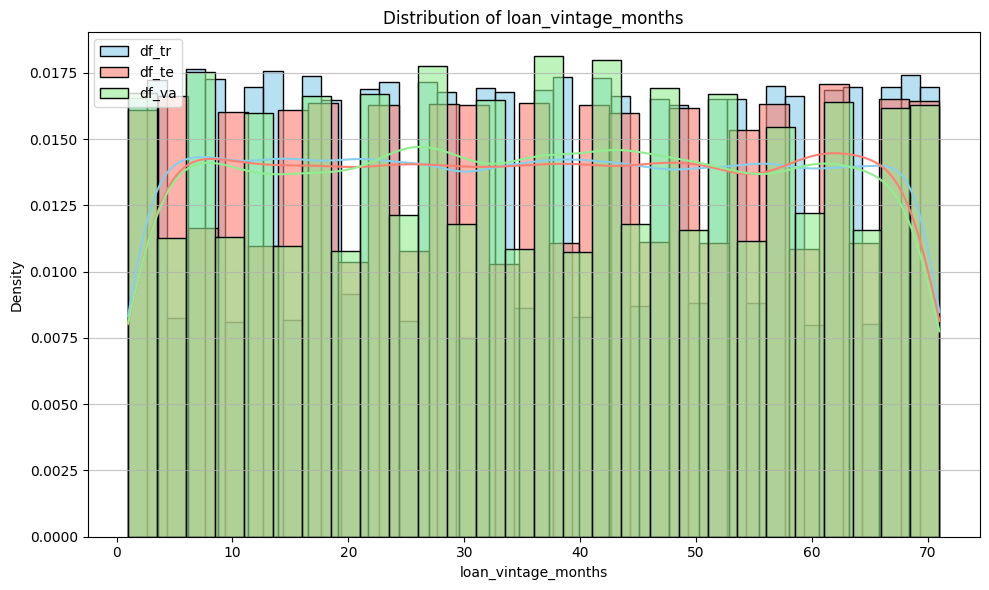

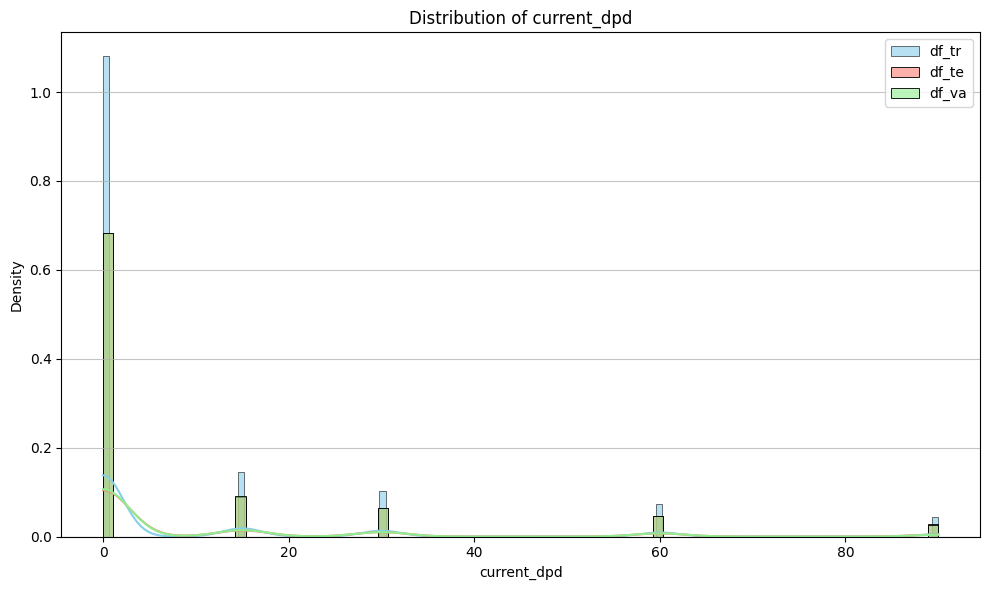

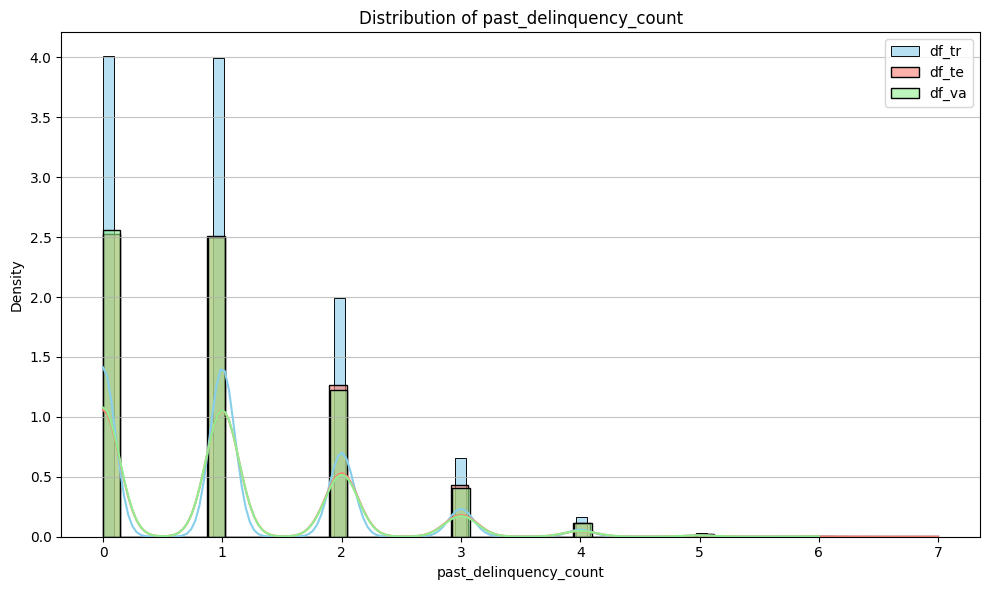

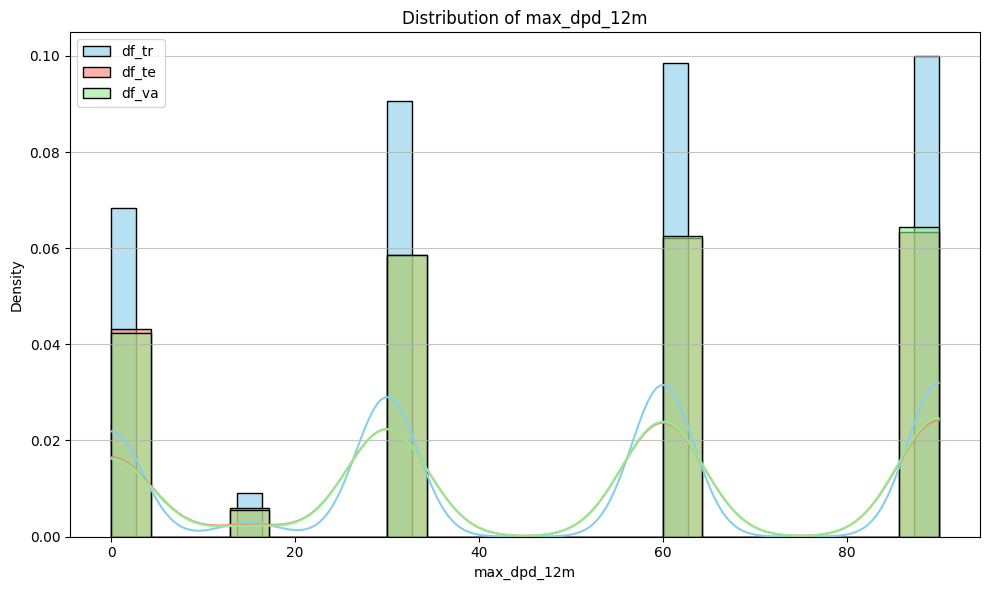

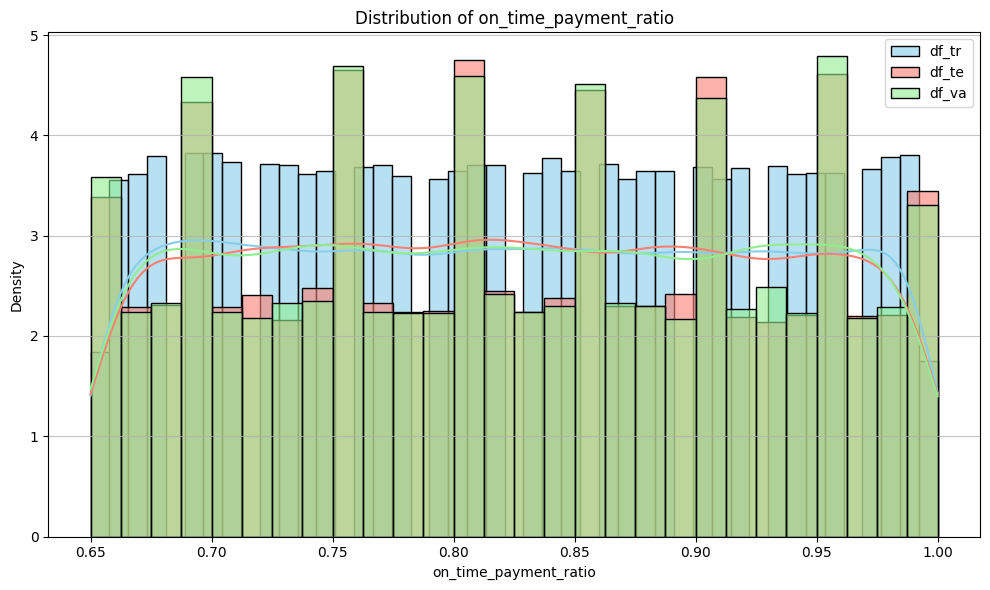

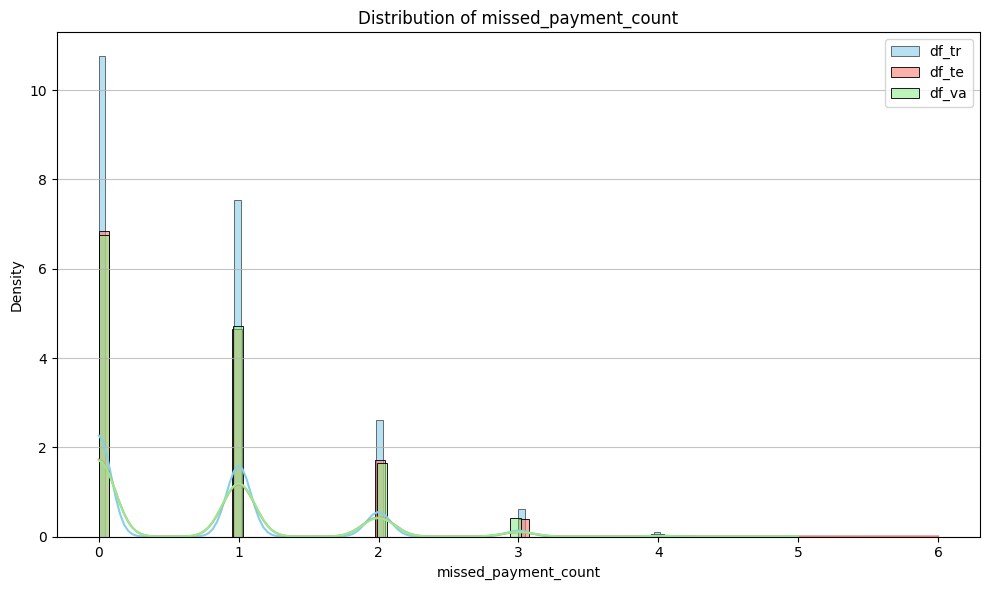

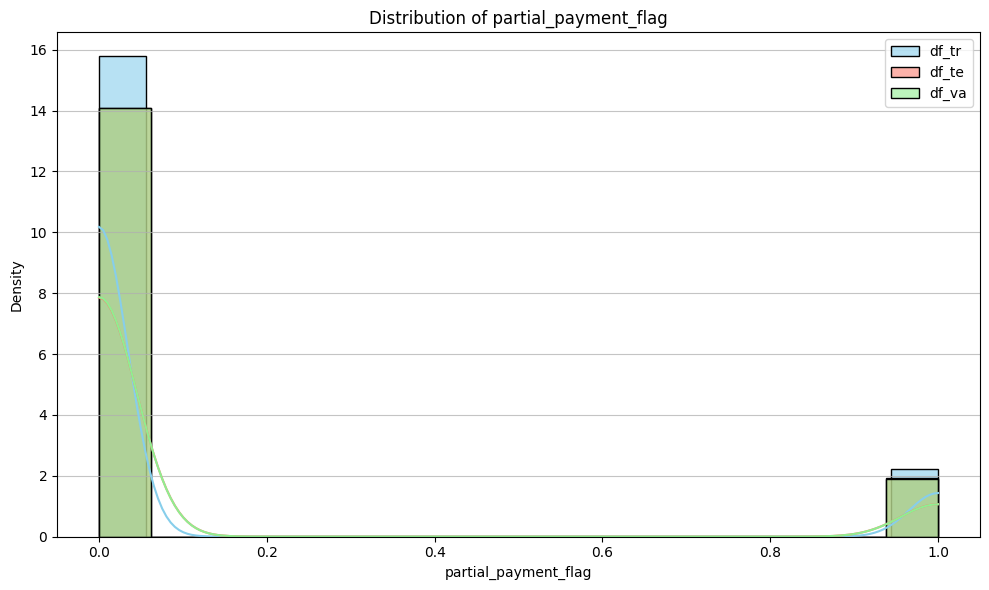

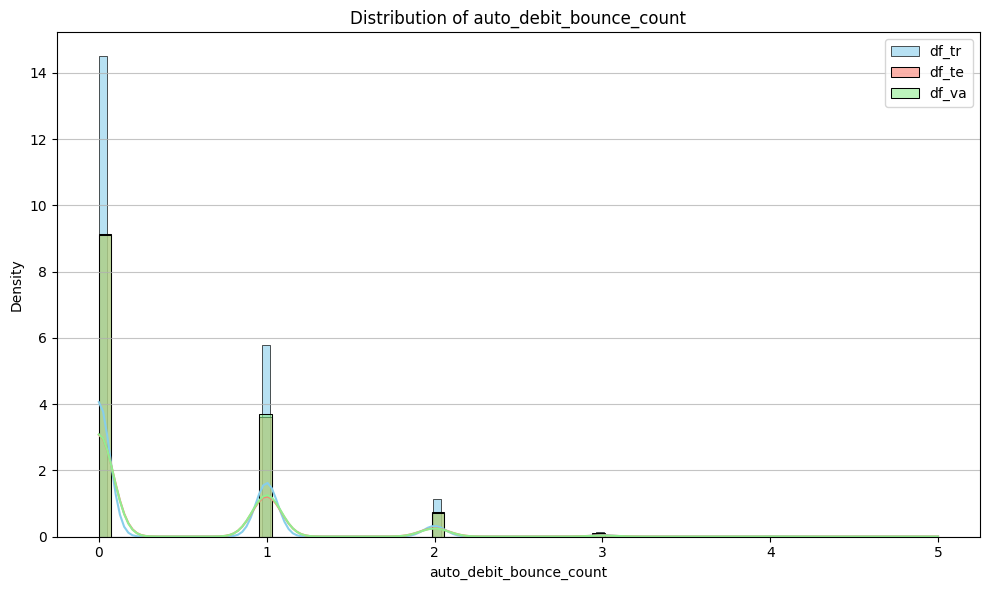

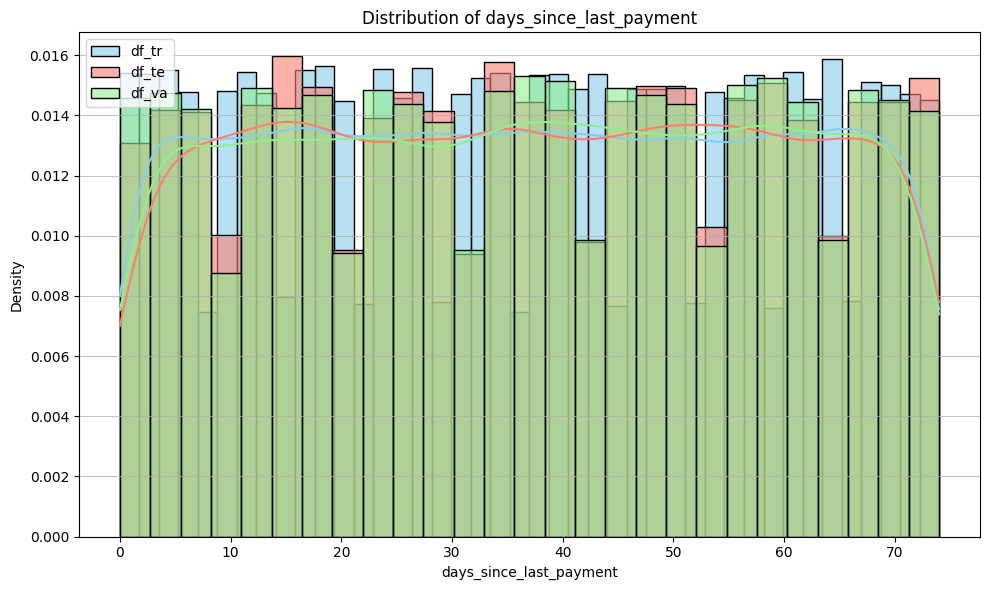

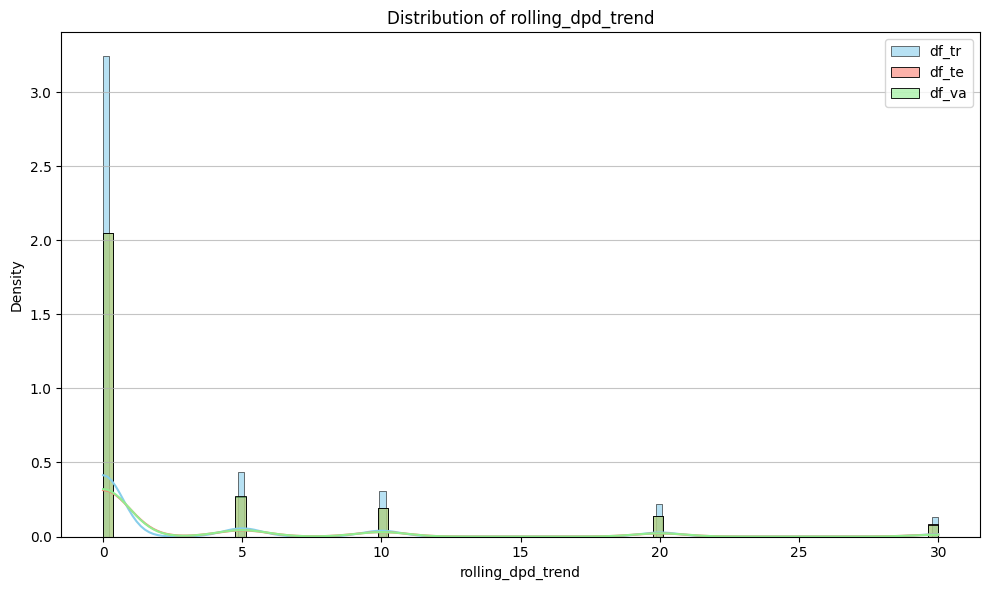

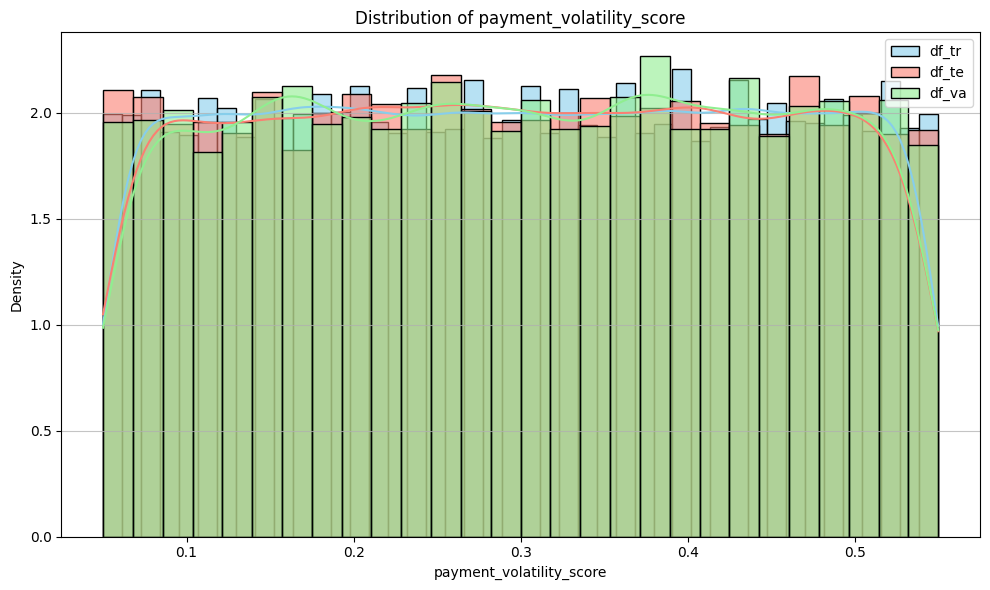

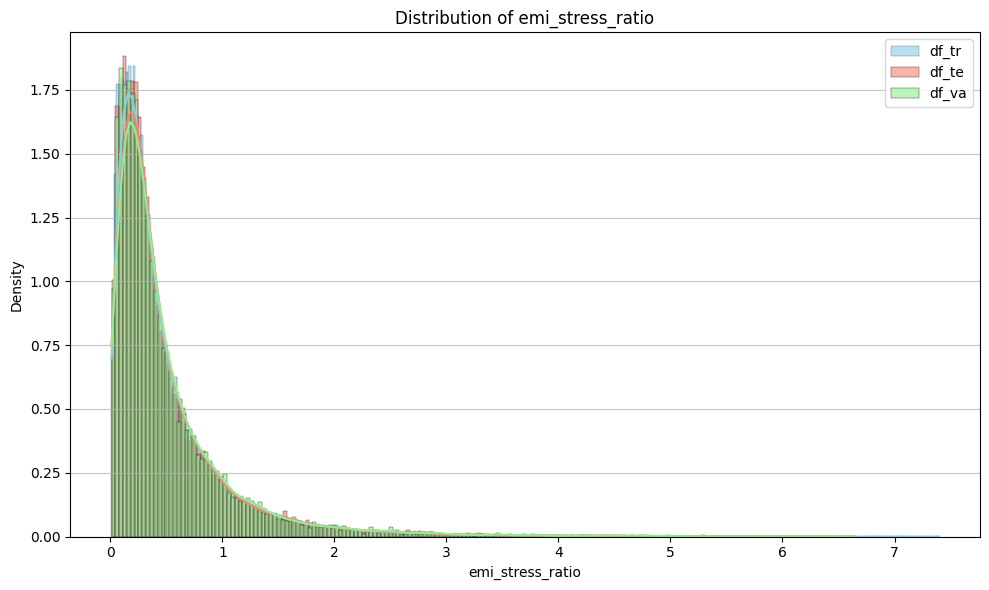

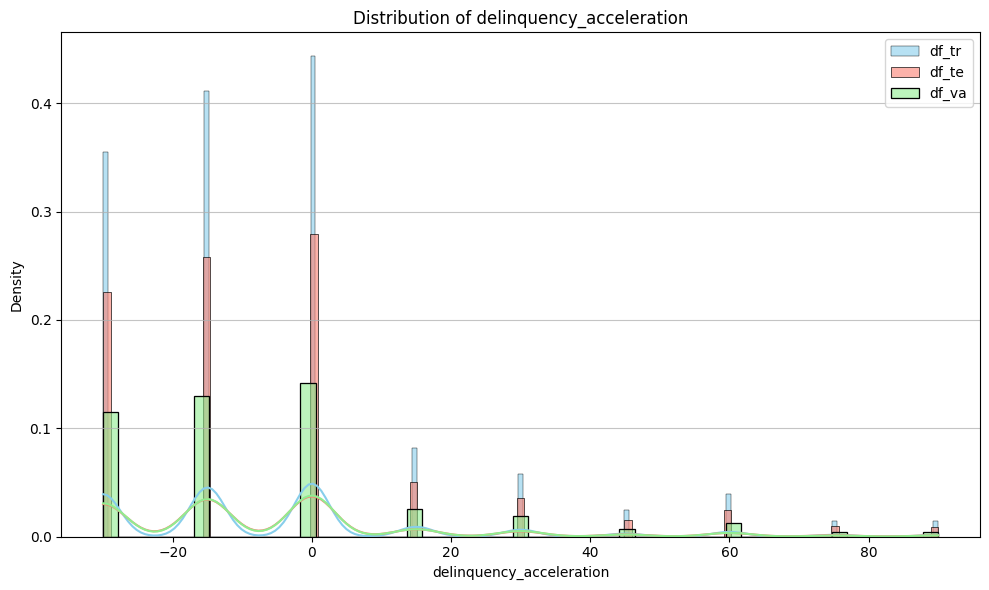

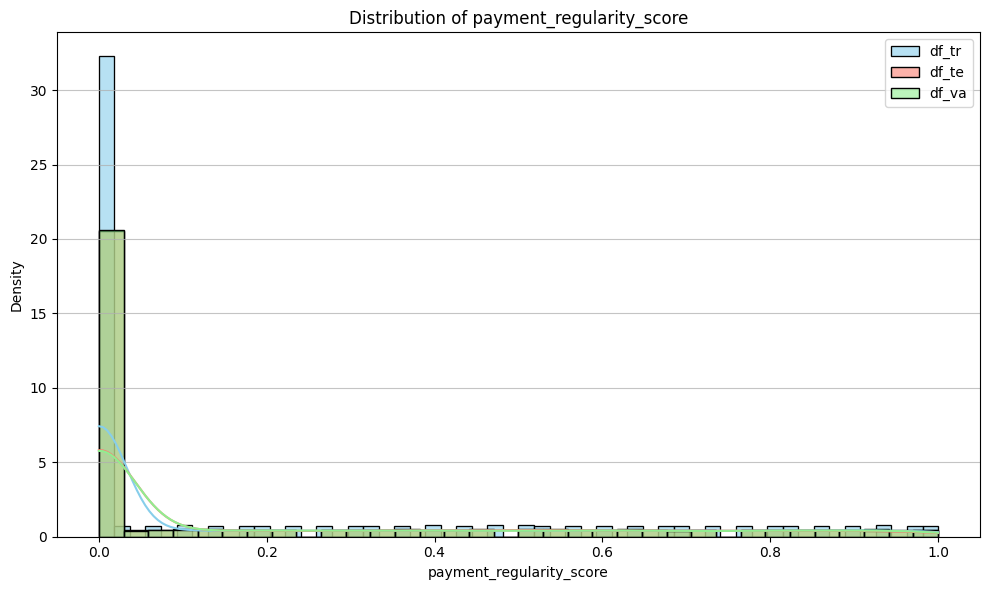

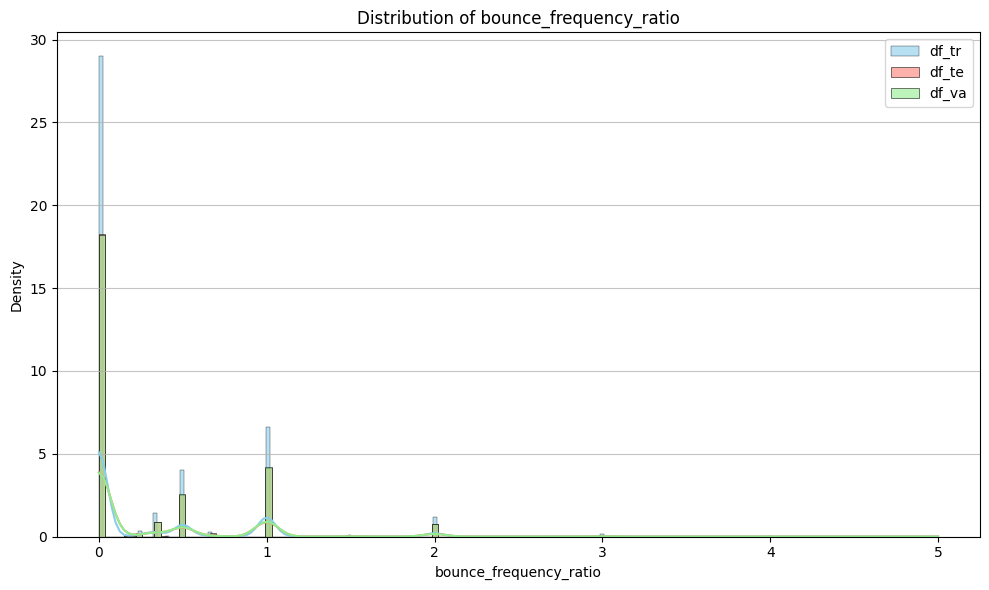

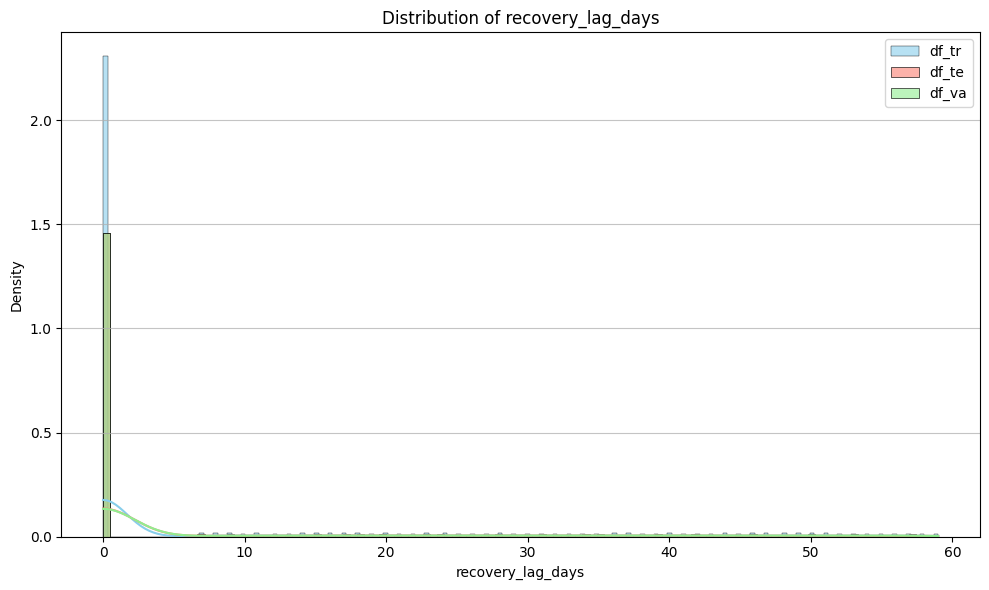

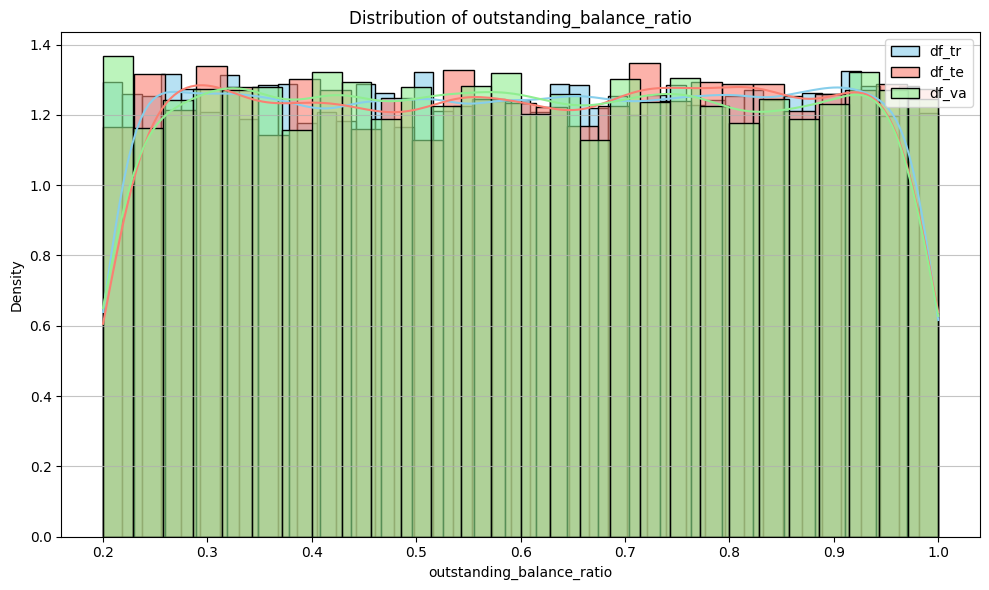

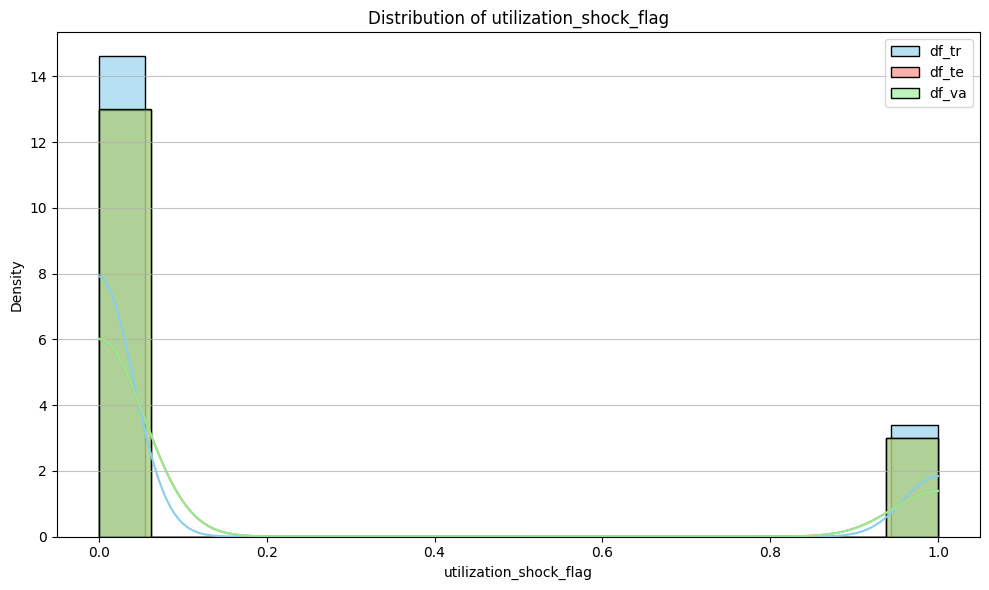

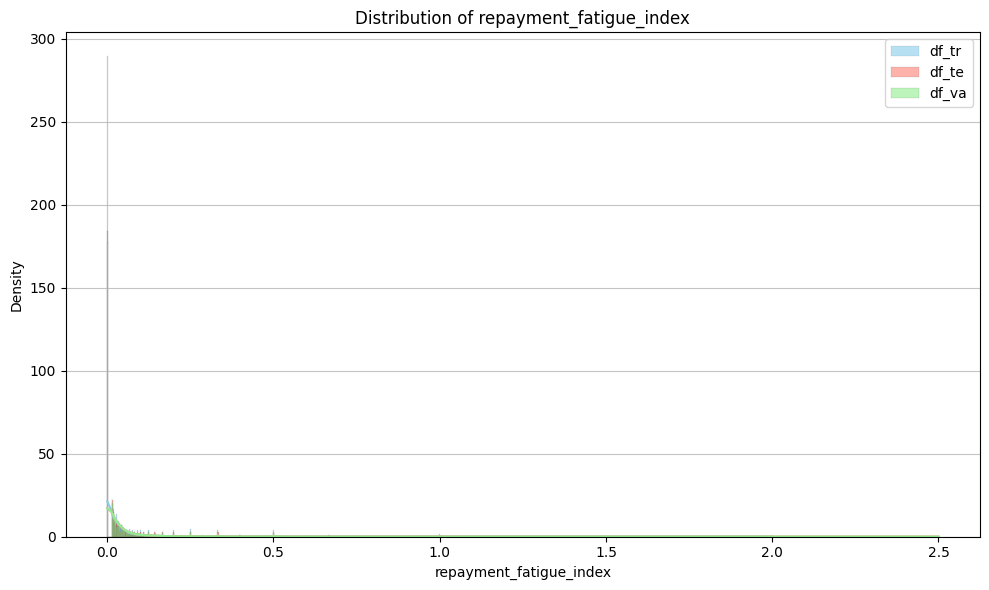

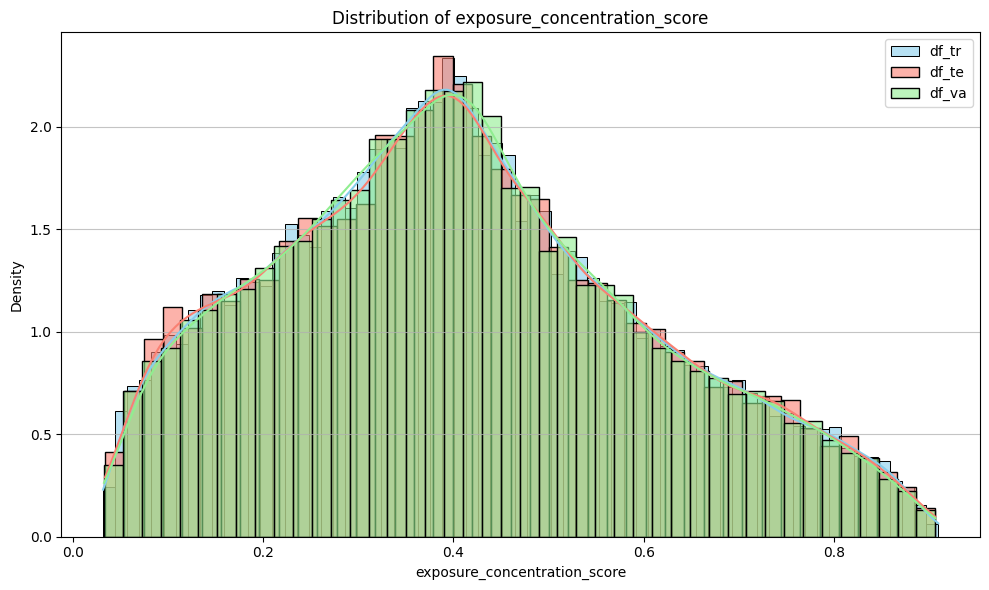

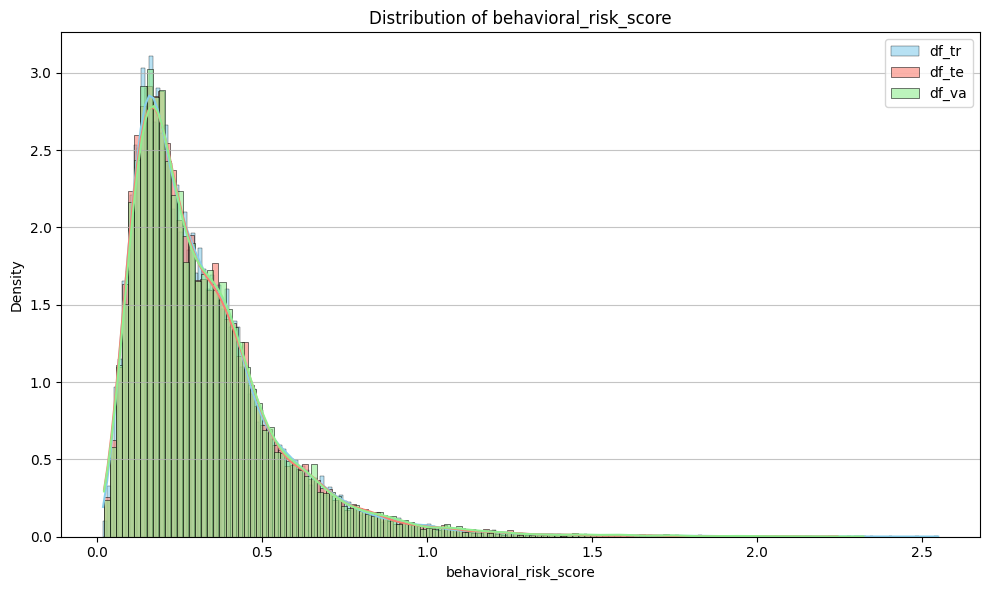

Histograms generation complete.


In [8]:
print("Generating histograms for numerical features...")

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_tr[col], color='skyblue', label='df_tr', kde=True, stat='density', alpha=0.6)
    sns.histplot(df_te[col], color='salmon', label='df_te', kde=True, stat='density', alpha=0.6)
    sns.histplot(df_va[col], color='lightgreen', label='df_va', kde=True, stat='density', alpha=0.6)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

print("Histograms generation complete.")

**Reasoning**:
Now that the numerical features have been visualized, I will proceed to iterate through the categorical columns identified previously. For each categorical column, I will generate count plots to compare the distributions across `df_tr`, `df_te`, and `df_va`, handling the absence of `ews_flag` in `df_va` by plotting it only for `df_tr` and `df_te`. This aligns with the subtask's requirement to visualize categorical feature distributions.



Generating count plots for categorical features...


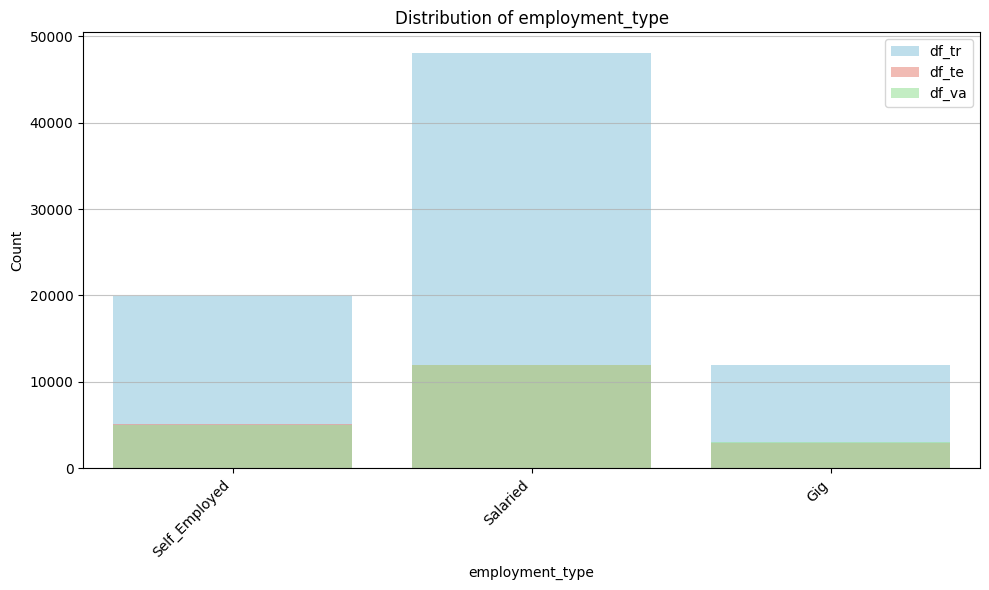

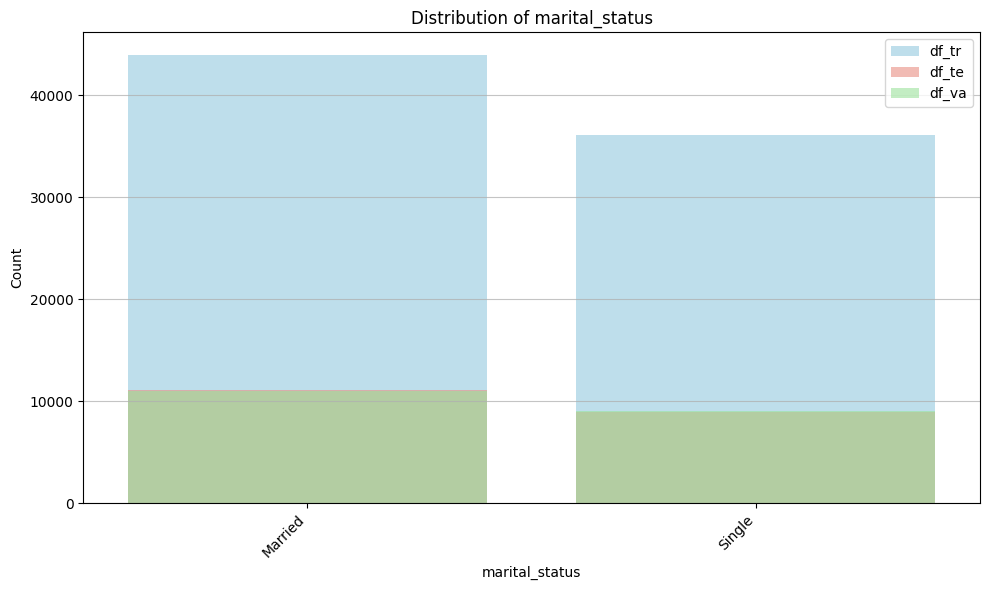

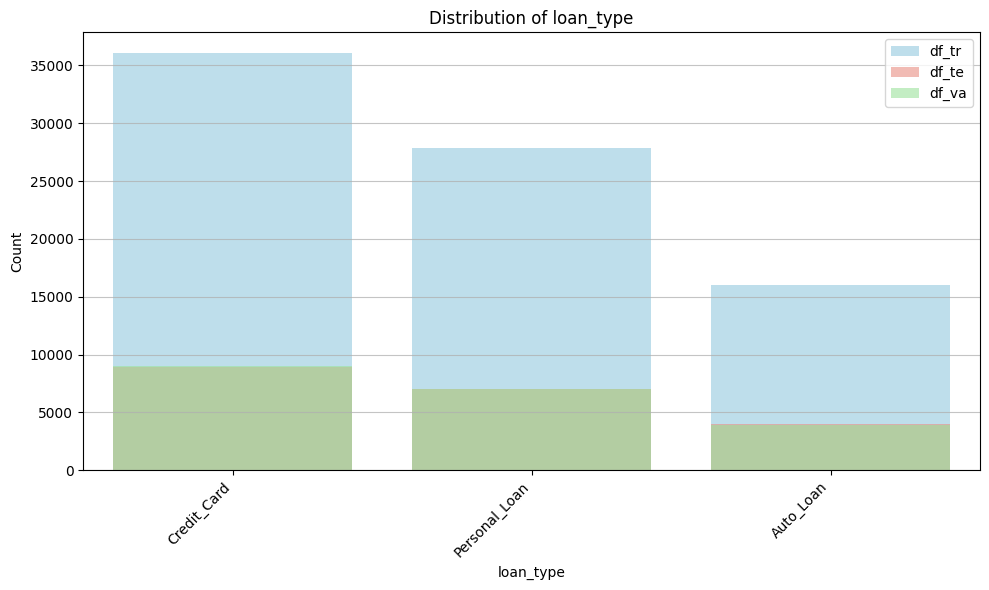

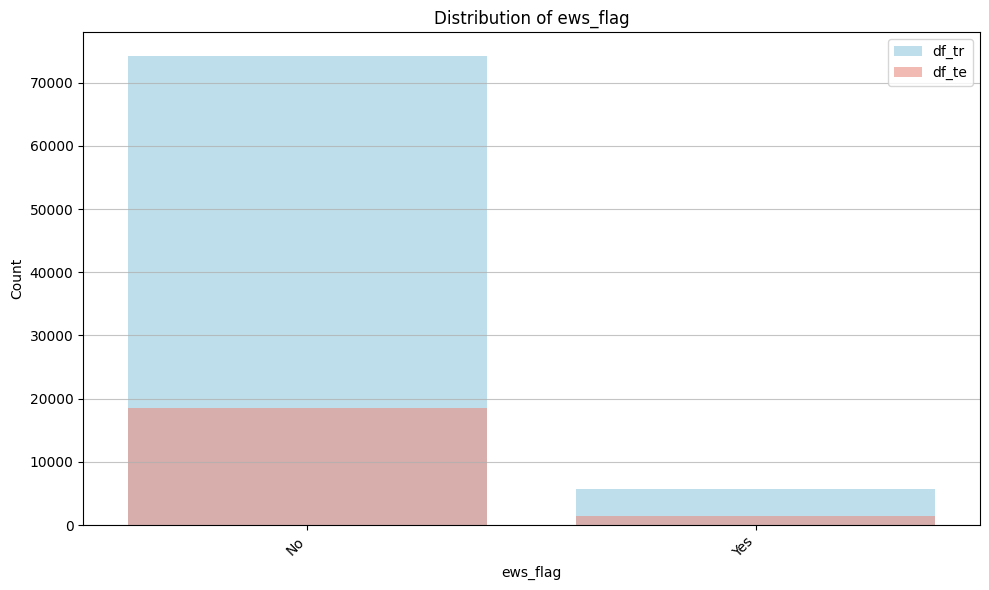

Count plots generation complete.


In [9]:
print("Generating count plots for categorical features...")

for col in categorical_cols:
    plt.figure(figsize=(10, 6))

    if col == 'ews_flag':
        # ews_flag is only in df_tr and df_te
        sns.countplot(data=df_tr, x=col, color='skyblue', label='df_tr', alpha=0.6)
        sns.countplot(data=df_te, x=col, color='salmon', label='df_te', alpha=0.6)
    else:
        # For other categorical columns, plot across all three dataframes
        sns.countplot(data=df_tr, x=col, color='skyblue', label='df_tr', alpha=0.6)
        sns.countplot(data=df_te, x=col, color='salmon', label='df_te', alpha=0.6)
        sns.countplot(data=df_va, x=col, color='lightgreen', label='df_va', alpha=0.6)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

print("Count plots generation complete.")

## Compare Datasets

### Subtask:
Compare key statistics or feature distributions across the `df_tr`, `df_te`, and `df_va` datasets to identify any significant differences or inconsistencies that might affect model training.


**Reasoning**:
I will generate and print descriptive statistics for each numerical column across `df_tr`, `df_te`, and `df_va` for a side-by-side comparison, as requested by the first instruction of the subtask.



In [10]:
print("--- Numerical Features: Descriptive Statistics Comparison ---")

for col in numerical_cols:
    print(f"\n--- Column: {col} ---")
    print("df_tr:\n", df_tr[col].describe())
    print("\ndf_te:\n", df_te[col].describe())
    print("\ndf_va:\n", df_va[col].describe())


--- Numerical Features: Descriptive Statistics Comparison ---

--- Column: borrower_age ---
df_tr:
 count    80000.000000
mean        42.561100
std         12.666973
min         21.000000
25%         32.000000
50%         43.000000
75%         53.000000
max         64.000000
Name: borrower_age, dtype: float64

df_te:
 count    20000.000000
mean        42.522400
std         12.703132
min         21.000000
25%         32.000000
50%         43.000000
75%         53.000000
max         64.000000
Name: borrower_age, dtype: float64

df_va:
 count    20000.000000
mean        42.438400
std         12.699306
min         21.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         64.000000
Name: borrower_age, dtype: float64

--- Column: employment_tenure_years ---
df_tr:
 count    80000.000000
mean        10.234772
std          5.631715
min          0.500000
25%          5.300000
50%         10.200000
75%         15.100000
max         20.000000
Name: employment_tenure_

**Reasoning**:
I will calculate and print the value counts and normalized percentages for each categorical column across `df_tr`, `df_te`, and `df_va`. For the `ews_flag` column, I will handle the case where it's missing in `df_va` as specified in the instructions. This addresses the second instruction of the subtask.



In [11]:
print("--- Categorical Features: Value Counts Comparison ---")

for col in categorical_cols:
    print(f"\n--- Column: {col} ---")

    print("df_tr Value Counts:")
    print(df_tr[col].value_counts())
    print("df_tr Normalized Value Counts:")
    print(df_tr[col].value_counts(normalize=True))

    print("\ndf_te Value Counts:")
    print(df_te[col].value_counts())
    print("df_te Normalized Value Counts:")
    print(df_te[col].value_counts(normalize=True))

    if col != 'ews_flag': # ews_flag is not in df_va
        print("\ndf_va Value Counts:")
        print(df_va[col].value_counts())
        print("df_va Normalized Value Counts:")
        print(df_va[col].value_counts(normalize=True))


--- Categorical Features: Value Counts Comparison ---

--- Column: employment_type ---
df_tr Value Counts:
employment_type
Salaried         48053
Self_Employed    19979
Gig              11968
Name: count, dtype: int64
df_tr Normalized Value Counts:
employment_type
Salaried         0.600662
Self_Employed    0.249738
Gig              0.149600
Name: proportion, dtype: float64

df_te Value Counts:
employment_type
Salaried         11973
Self_Employed     5069
Gig               2958
Name: count, dtype: int64
df_te Normalized Value Counts:
employment_type
Salaried         0.59865
Self_Employed    0.25345
Gig              0.14790
Name: proportion, dtype: float64

df_va Value Counts:
employment_type
Salaried         11924
Self_Employed     5014
Gig               3062
Name: count, dtype: int64
df_va Normalized Value Counts:
employment_type
Salaried         0.5962
Self_Employed    0.2507
Gig              0.1531
Name: proportion, dtype: float64

--- Column: marital_status ---
df_tr Value Counts:
m

## Final Task

### Subtask:
Summarize the key insights gained from the data analysis and visualization, highlighting any important findings or potential next steps before proceeding with model training.


## Summary:

### Data Analysis Key Findings

*   The training dataset (`df_tr`) contains 80,000 rows and 40 columns, while the test (`df_te`) and validation (`df_va`) datasets each have 20,000 rows.
*   `df_tr` and `df_te` both include 40 columns, comprising 19 float, 16 integer, and 5 object-type features, including the `ews_flag` target variable.
*   `df_va` contains 39 columns (19 float, 16 integer, and 4 object-type features), notably lacking the `ews_flag` column, which is expected for an inference or validation dataset.
*   No missing values were found across any of the features in `df_tr`, `df_te`, or `df_va`, indicating clean datasets.
*   Comparative analysis of numerical features showed "remarkably similar" descriptive statistics (mean, standard deviation, quartiles, etc.) across `df_tr`, `df_te`, and `df_va`.
*   Categorical feature distributions (`employment_type`, `marital_status`, `loan_type`) were also consistent across all three datasets. The `ews_flag` distribution was consistent between `df_tr` and `df_te`.

### Insights or Next Steps

*   The consistent feature distributions and lack of missing values across all datasets (`df_tr`, `df_te`, `df_va`) suggest that the data is well-prepared for model training, requiring minimal preprocessing related to dataset differences.
*   The clear distinction of `df_va` lacking the `ews_flag` confirms its intended use as a hold-out set for model evaluation or prediction, which is crucial for assessing generalization performance.
